# Figure 2: MNIST best test accuracies

This notebook loads every MNIST summary CSV in `results/MNIST`, extracts `best_test_acc` values, and plots them against the baseline run.


In [ ]:
from pathlib import Path
import pandas as pd


def find_mnist_results_dir(start=None):
    start = Path.cwd() if start is None else Path(start)
    for path in [start, *start.parents]:
        candidate = path / "results" / "MNIST"
        if candidate.exists():
            return candidate
    raise FileNotFoundError("Could not find results/MNIST relative to the current working directory.")

mnist_results = find_mnist_results_dir()
summary_files = sorted(mnist_results.glob("summary_*.csv"))
if not summary_files:
    raise FileNotFoundError(f"No summary_*.csv files found under {mnist_results}")

rows = []
for csv_path in summary_files:
    df = pd.read_csv(csv_path)
    if "best_test_acc" not in df.columns:
        continue
    for _, row in df.iterrows():
        if str(row.get("dataset", "")).lower() != "mnist":
            continue
        arch = str(row.get("architecture", "unknown"))
        kernel = str(row.get("kernel_type", ""))
        m_feat = str(row.get("m_features", ""))
        label = f"{arch} | {kernel} | m={m_feat}"
        rows.append(
            {
                "architecture": arch,
                "kernel_type": kernel,
                "m_features": m_feat,
                "label": label,
                "best_test_acc": float(row["best_test_acc"]),
                "summary_file": csv_path.name,
            }
        )

acc_df = pd.DataFrame(rows)
if acc_df.empty:
    raise ValueError("No MNIST rows found in summary files.")
acc_df.head()


,architecture,kernel_type,m_features,label,best_test_acc,summary_file
0,all_performer,relu,128,all_performer | relu | m=128,98.85,summary_arch-all_performer_kernel-relu_m-128.csv
1,all_performer,relu,16,all_performer | relu | m=16,98.65,summary_arch-all_performer_kernel-relu_m-16.csv
2,all_performer,relu,256,all_performer | relu | m=256,98.67,summary_arch-all_performer_kernel-relu_m-256.csv
3,all_performer,relu,32,all_performer | relu | m=32,98.75,summary_arch-all_performer_kernel-relu_m-32.csv
4,all_performer,relu,64,all_performer | relu | m=64,98.51,summary_arch-all_performer_kernel-relu_m-64.csv


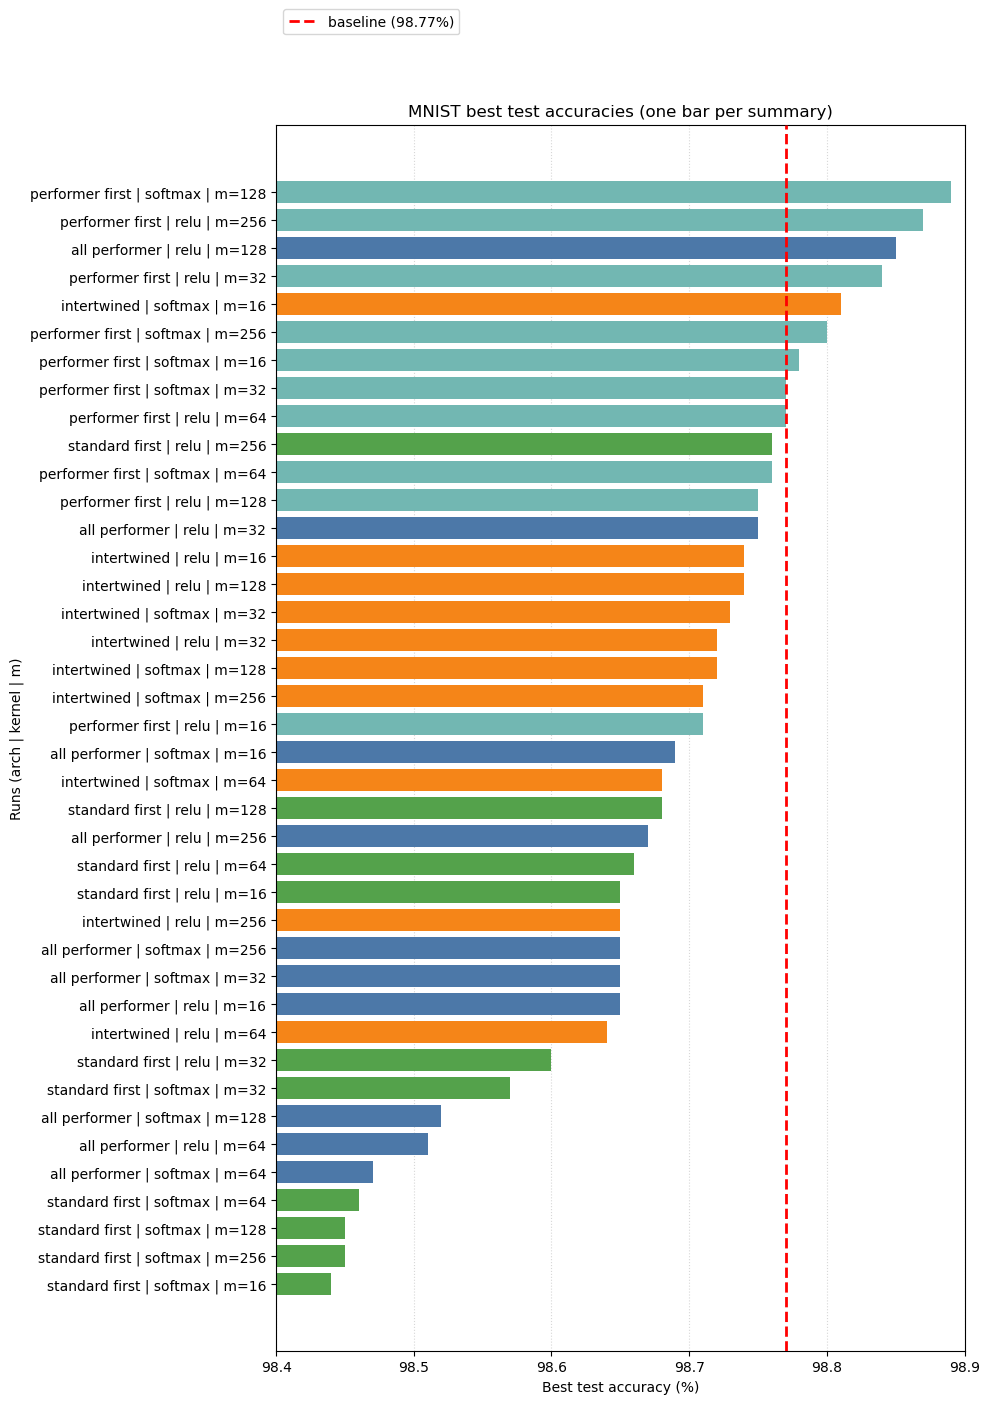

In [64]:
import matplotlib.pyplot as plt

baseline_row = acc_df.loc[acc_df["summary_file"] == "summary_baseline.csv"]
baseline_acc = baseline_row["best_test_acc"].iloc[0] if not baseline_row.empty else None

plot_df = acc_df[acc_df["summary_file"] != "summary_baseline.csv"].copy()
plot_df = plot_df.sort_values("best_test_acc", ascending=False).reset_index(drop=True)

arch_colors = {
    "all_performer": "#4C78A8",
    "performer_first": "#72B7B2",
    "standard_first": "#54A24B",
    "intertwined": "#F58518",
}

labels = [
    f"{row['architecture'].replace('_', ' ')} | {row['kernel_type']} | m={row['m_features']}"
    for _, row in plot_df.iterrows()
]
colors = [arch_colors.get(row["architecture"], "#888888") for _, row in plot_df.iterrows()]

fig, ax = plt.subplots(figsize=(10, max(4, 0.35 * len(plot_df))))
ax.barh(labels, plot_df["best_test_acc"], color=colors, zorder=2)
ax.invert_yaxis()  # best on top

if baseline_acc is not None:
    ax.axvline(baseline_acc, color="red", linestyle="--", linewidth=2, label=f"baseline ({baseline_acc:.2f}%)", zorder=3)

ax.set_xlabel("Best test accuracy (%)")
ax.set_ylabel("Runs (arch | kernel | m)")
ax.set_xlim(98.4, 98.9)
ax.set_title("MNIST best test accuracies (one bar per summary)")
ax.grid(axis="x", linestyle=":", alpha=0.5, zorder=1)

if baseline_acc is not None:
    ax.legend(loc="upper left", bbox_to_anchor=(0, 1.1))

plt.tight_layout()


In [65]:
from pathlib import Path
import pandas as pd

def find_cifar_results_dir(start=None):
    start = Path.cwd() if start is None else Path(start)
    for path in [start, *start.parents]:
        candidate = path / "results" / "CIFAR10"
        if candidate.exists():
            return candidate
    raise FileNotFoundError("Could not find results/CIFAR10 relative to the current working directory.")

cifar_results = find_cifar_results_dir()
summary_files = sorted(cifar_results.glob("summary_*.csv"))
if not summary_files:
    raise FileNotFoundError(f"No summary_*.csv files found under {cifar_results}")

rows = []
for csv_path in summary_files:
    df = pd.read_csv(csv_path)
    if "best_test_acc" not in df.columns:
        continue
    for _, row in df.iterrows():
        if str(row.get("dataset", "")).lower() != "cifar10":
            continue
        arch = str(row.get("architecture", "unknown"))
        kernel = str(row.get("kernel_type", ""))
        m_feat = str(row.get("m_features", ""))
        label = f"{arch} | {kernel} | m={m_feat}"
        rows.append(
            {
                "architecture": arch,
                "kernel_type": kernel,
                "m_features": m_feat,
                "label": label,
                "best_test_acc": float(row["best_test_acc"]),
                "summary_file": csv_path.name,
            }
        )

acc_df = pd.DataFrame(rows)
if acc_df.empty:
    raise ValueError("No CIFAR10 rows found in summary files.")
acc_df.head()


,architecture,kernel_type,m_features,label,best_test_acc,summary_file
0,all_performer,relu,128,all_performer | relu | m=128,73.45,summary_arch-all_performer_kernel-relu_m-128.csv
1,all_performer,relu,16,all_performer | relu | m=16,74.20,summary_arch-all_performer_kernel-relu_m-16.csv
2,all_performer,relu,256,all_performer | relu | m=256,74.15,summary_arch-all_performer_kernel-relu_m-256.csv
3,all_performer,relu,32,all_performer | relu | m=32,75.08,summary_arch-all_performer_kernel-relu_m-32.csv
4,all_performer,relu,512,all_performer | relu | m=512,74.26,summary_arch-all_performer_kernel-relu_m-512.csv


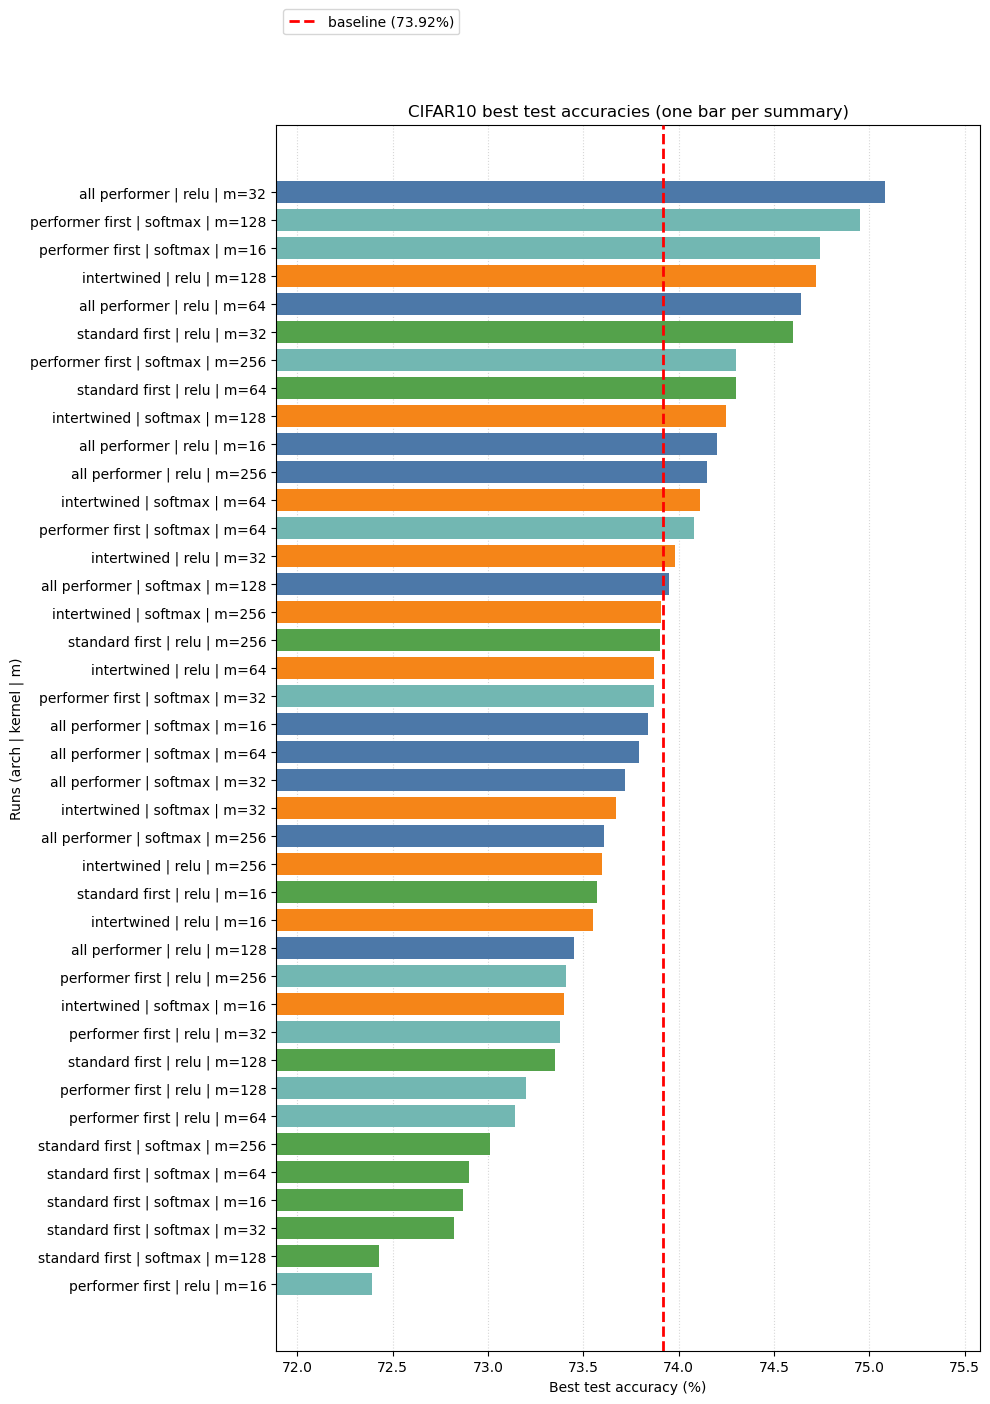

In [ ]:
import matplotlib.pyplot as plt

baseline_row = acc_df.loc[acc_df.get("summary_file", []) == "summary_baseline.csv"]
baseline_acc = baseline_row["best_test_acc"].iloc[0] if not baseline_row.empty else None

arch_colors = {
    "all_performer": "#4C78A8",
    "performer_first": "#72B7B2",
    "standard_first": "#54A24B",
    "intertwined": "#F58518",
}

# Keep only listed architectures and drop m=512
plot_df = acc_df.copy()
plot_df = plot_df[
    plot_df["architecture"].isin(arch_colors.keys()) & (plot_df["m_features"].astype(str) != "512")
]
plot_df = plot_df.sort_values("best_test_acc", ascending=False).reset_index(drop=True)

labels = [
    f"{row['architecture'].replace('_', ' ')} | {row['kernel_type']} | m={row['m_features']}"
    for _, row in plot_df.iterrows()
]
colors = [arch_colors[row["architecture"]] for _, row in plot_df.iterrows()]

fig, ax = plt.subplots(figsize=(10, max(4, 0.35 * len(plot_df))))
ax.barh(labels, plot_df["best_test_acc"], color=colors, zorder=2)
ax.invert_yaxis()  

if baseline_acc is not None:
    ax.axvline(baseline_acc, color="red", linestyle="--", linewidth=2, label=f"baseline ({baseline_acc:.2f}%)", zorder=3)

ax.set_xlabel("Best test accuracy (%)")
ax.set_ylabel("Runs (arch | kernel | m)")

epsilon = 0.5  
xmin = plot_df["best_test_acc"].min() - epsilon
xmax = plot_df["best_test_acc"].max() + epsilon
ax.set_xlim(xmin, xmax)

ax.set_title("CIFAR10 best test accuracies (one bar per summary)")
ax.grid(axis="x", linestyle=":", alpha=0.5, zorder=1)

if baseline_acc is not None:
    ax.legend(loc="upper left", bbox_to_anchor=(0, 1.1))

plt.tight_layout()
